In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import timesynth as ts

import matplotlib.pyplot as plt

from rpca import RPCA
from improved_rpca import ImprovedRPCA, ImprovedRPCAHyperparams
from noisy_rpca import NoisyRPCA, NoisyRPCAHyperparams

**Generate synthetic data**

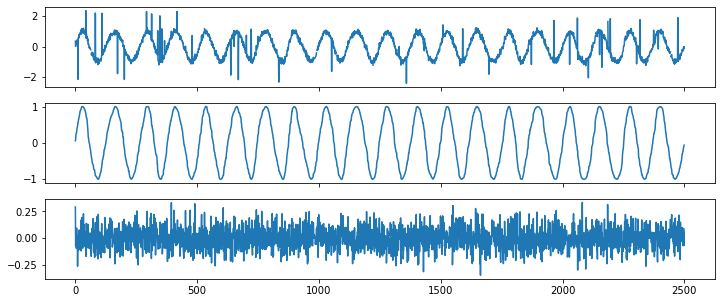

In [20]:
time_sampler = ts.TimeSampler(stop_time=20)
irregular_time_samples = time_sampler.sample_irregular_time(num_points=5_000, keep_percentage=50)
sinusoid = ts.signals.Sinusoidal(frequency=1)
white_noise = ts.noise.GaussianNoise(std=0.1)
timeseries = ts.TimeSeries(sinusoid, noise_generator=white_noise)
samples, signals, errors = timeseries.sample(irregular_time_samples)

n = len(samples)
indices = np.random.choice(n, int(n*0.02))
samples[indices] = [np.random.uniform(low=2*np.min(samples), high=2*np.max(samples)) for i in range(int(n*0.02))]
indices = np.random.choice(n, int(n*0.02))
samples[indices] = np.nan

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(12,5))
ax[0].plot(range(len(samples)), samples)
ax[1].plot(range(len(signals)), signals)
ax[2].plot(range(len(errors)), errors)
plt.show()

**RPCA**

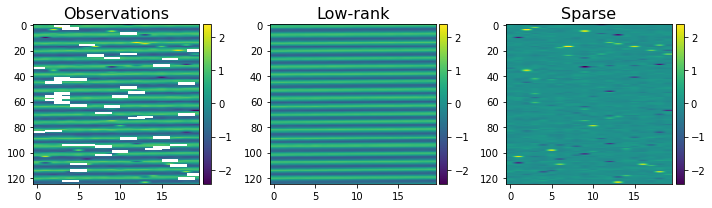

CPU times: user 563 ms, sys: 64.8 ms, total: 628 ms
Wall time: 279 ms


In [37]:
%%time

rpca = RPCA(signal=samples.tolist(), period=20)
rpca.prepare_data()
rpca.compute_rpca()
rpca.plot_matrices()
rpca.plot_signal()

**improve PCA**

1


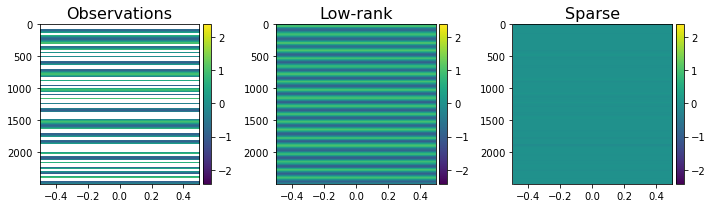

CPU times: user 19.4 s, sys: 6.46 s, total: 25.9 s
Wall time: 4.29 s


In [40]:
%%time

irpca = ImprovedRPCA(signal=samples.tolist(), lam=0.4, list_periods=[1], list_etas=[0.1])
irpca.compute_improve_rpca()
irpca.plot_matrices()
irpca.plot_signal()

In [ ]:
%%time

hp = ImprovedRPCAHyperparams(signal=samples.tolist())
hp.add_hyperparams(hyperparams_lam=[0.05, 0.2])
hp.compute_improve_rpca_hyperparams()
hp.plot_matrices()
hp.plot_signal()

**noisy RPCA**

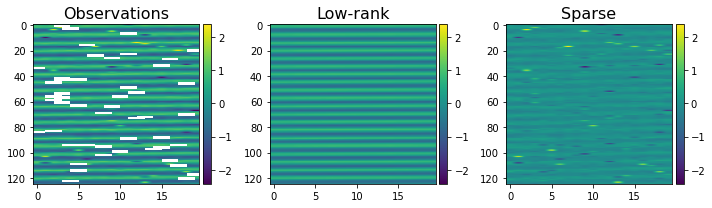

CPU times: user 1min 40s, sys: 22.9 s, total: 2min 3s
Wall time: 19.2 s


In [36]:
%%time

nrpca = NoisyRPCA(signal=samples.tolist(), period=20, tau=3, lam=2.4)#, list_periods=[1], list_etas=[1])
nrpca.compute_noisy_rpca()
nrpca.plot_matrices()
nrpca.plot_signal()